In [2]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def plot_learning_curve_hyper(df, x_axis_label, y_axis_label, title, ax=None, ylim=None):
  x = []
  for ele in df.params:
    for k, v in ele.items():
      x.append(str(v))
  if ax is None:
    _, ax = plt.subplots(figsize=(14, 10))

  ax.set_title(title)
  if ylim is not None:
    ax.set_ylim(*ylim)
  ax.set_xlabel(x_axis_label)
  ax.set_ylabel(y_axis_label)
  ax.grid()
  ax.fill_between(
    x,
    (df['mean_train_score'] - df['std_train_score']).values,
    (df['mean_train_score'] + df['std_train_score']).values,
    alpha=0.1,
    color="r",
    )
  ax.fill_between(
    x,
    (df['mean_test_score'] - df['std_test_score']).values,
    (df['mean_test_score'] + df['std_test_score']).values,
    alpha=0.1,
    color="g",
    )
  ax.plot(x, df['mean_train_score'], "x-", color = 'r', label = 'Training Score')
  ax.plot(x, df['mean_test_score'], "x-", color = 'g', label = 'Cross-validation Score')
  ax.legend(loc="best")

In [4]:
def plot_learning_curve(model, X, y, X_train=None, X_val=None, y_train=None, y_val=None):

  if X_train is None: 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=27)
  train_errors, val_errors = [], []
  train_size = np.linspace(10, len(X_train), 10).astype(int)
  for m in train_size:
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(f1_score(y_train[:m], y_train_predict, average='macro'))
    val_errors.append(f1_score(y_val, y_val_predict, average= 'macro'))
  plt.grid()
  plt.plot(train_size, train_errors, 'r', label= 'Training Error')
  plt.plot(train_size, val_errors, 'b', label = 'Validation Error')
  plt.ylabel('F1 Macro Score')
  plt.xlabel('Training Example Size')
  plt.legend(loc='best')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #1/Wine_Classification'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #1/Wine_Classification


In [7]:
import pandas as pd
df = pd.read_csv('winequality-white.csv', sep=';')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05b5240fd0>,
      dtype=object)

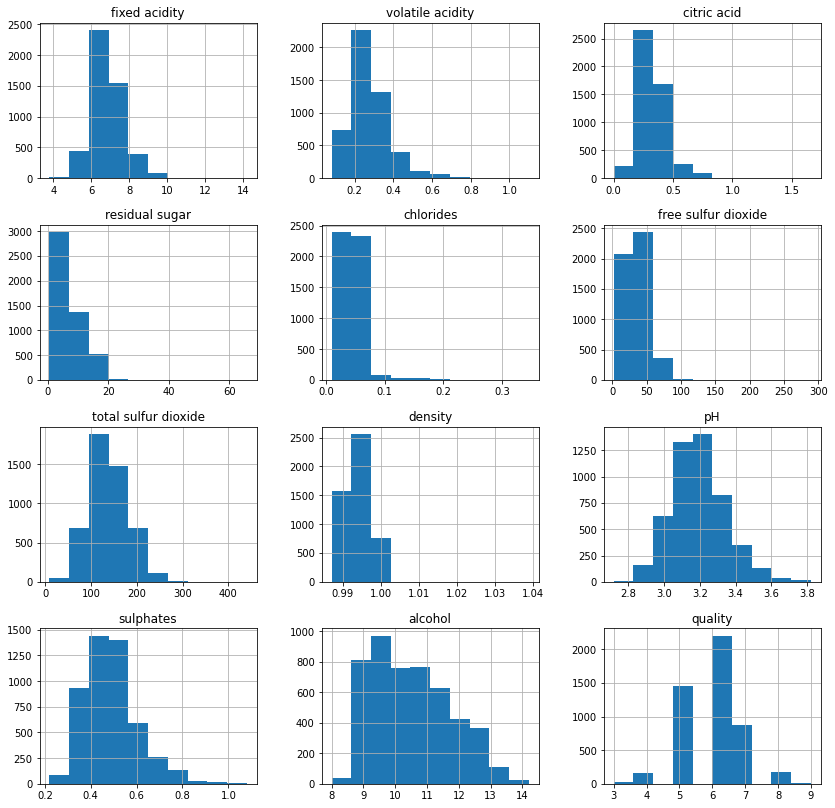

In [10]:
df.hist(figsize=(14,14))

In [11]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
# Defining X and y
X = df.drop('quality', axis = 1)
y = df['quality']

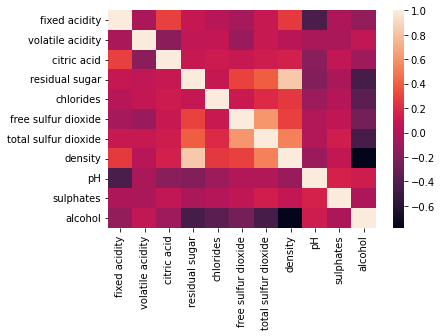

In [13]:
corr = X.corr()
sns.heatmap(corr)

In [14]:
corr.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


Resudual Sugar and Density has high corelation (0.8) with each other

In [15]:
#X = X.drop('density', axis=1)

In [16]:
#Splitting Train, Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    stratify=y, random_state = 27)

In [17]:
print(f'Y Train Dist:\n\n {y_train.value_counts()}')
print(f'\nY Test Dist:\n\n {y_test.value_counts()}')

Y Train Dist:

 6    1648
5    1093
7     660
8     131
4     122
3      15
9       4
Name: quality, dtype: int64

Y Test Dist:

 6    550
5    364
7    220
8     44
4     41
3      5
9      1
Name: quality, dtype: int64


In [18]:
# Try Quick and Dirty Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf_dt = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)

print(f'Classification Report on Test set:\n\n {classification_report(y_test, y_pred, zero_division=1)}')


Classification Report on Test set:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.27      0.26        41
           5       0.61      0.61      0.61       364
           6       0.65      0.66      0.65       550
           7       0.60      0.56      0.58       220
           8       0.39      0.43      0.41        44
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1225
   macro avg       0.36      0.36      0.36      1225
weighted avg       0.60      0.60      0.60      1225



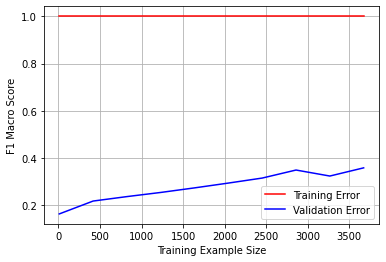

In [19]:
#Learning Curve For Naive Decision Tree
plot_learning_curve(clf_dt, X, y)

In [20]:
y_predTrain = clf_dt.predict(X_train)
print(f'Classification Report on Test set:\n\n {classification_report(y_train, y_predTrain, zero_division=1)}')

Classification Report on Test set:

               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00      1093
           6       1.00      1.00      1.00      1648
           7       1.00      1.00      1.00       660
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00         4

    accuracy                           1.00      3673
   macro avg       1.00      1.00      1.00      3673
weighted avg       1.00      1.00      1.00      3673



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

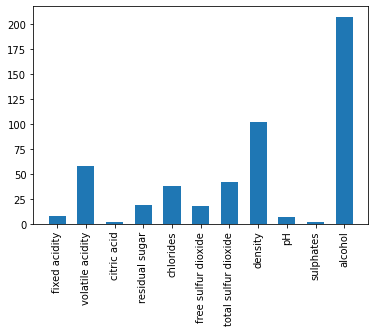

In [21]:
# Feature Selection using Anova Analysis
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)

selector.fit(X_train, y_train)

p_values = selector.pvalues_

scores = -np.log10(p_values)

plt.bar(X_train.columns, scores, width= 0.6, label=r"Univariate score ($-Log(p_{value})$)")
plt.xticks(rotation=90)

In [22]:
selection = SelectKBest(f_classif, k=6)



selection.fit(X_train, y_train)

print(f'List of features inputed:\n {selection.feature_names_in_}\n')
print(f'List of features selected:\n {X_train.columns[selection.get_support()]}')

X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)

List of features inputed:
 ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']

List of features selected:
 Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


In [23]:
# Try Quick and Dirty Decision Tree Classifier With Selected Features
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf_dt = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train_selected, y_train)

y_pred = clf_dt.predict(X_test_selected)

print(f'Classification Report on Test set:\n\n {classification_report(y_test, y_pred, zero_division=1)}')

Classification Report on Test set:

               precision    recall  f1-score   support

           3       0.17      0.20      0.18         5
           4       0.25      0.34      0.29        41
           5       0.62      0.61      0.62       364
           6       0.63      0.59      0.61       550
           7       0.49      0.53      0.51       220
           8       0.37      0.41      0.39        44
           9       1.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.50      0.38      0.37      1225
weighted avg       0.58      0.57      0.57      1225



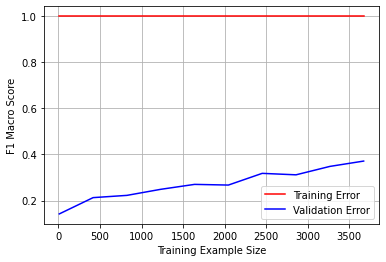

In [24]:
plot_learning_curve(clf_dt, X, y, X_train = X_train_selected, X_val = X_test_selected, y_train = y_train, y_val = y_test)

In [25]:
# Exploring Hyperparameters Through Grid Search
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='f1_macro')

In [26]:
df_criterion = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'criterion': 'entropy'}

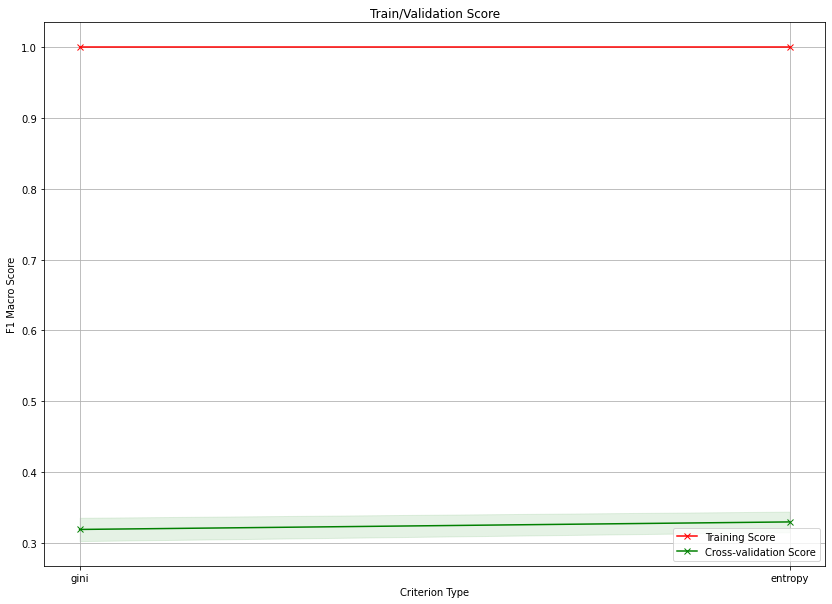

In [27]:
plot_learning_curve_hyper(df_criterion, 'Criterion Type', 'F1 Macro Score',
                          'Train/Validation Score')

In [28]:
# Exploring Hyperparameters Through Grid Search
# Splitter Parameter
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'splitter': ['best', 'random']}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_macro')

In [29]:
df_splitter = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'splitter': 'best'}

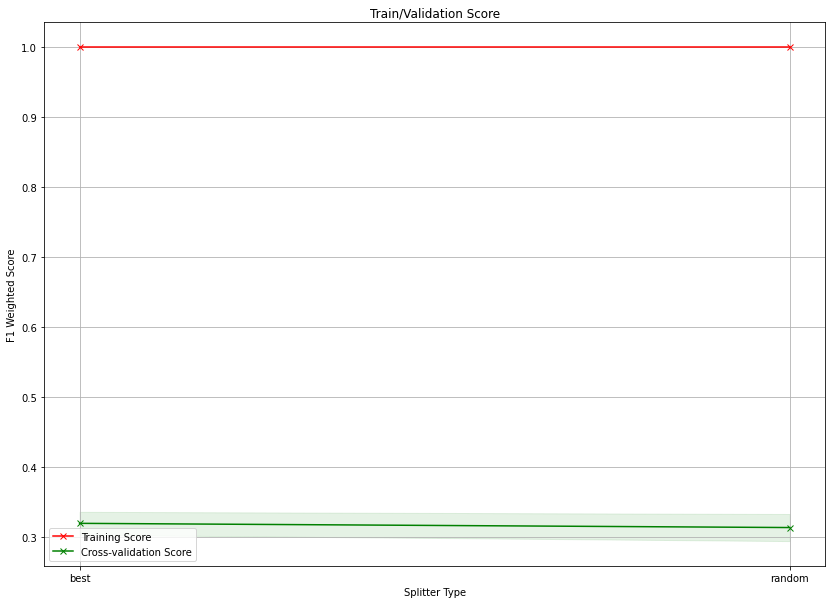

In [30]:
plot_learning_curve_hyper(df_splitter, 'Splitter Type', 'F1 Weighted Score',
                          'Train/Validation Score')

In [31]:
# Exploring Hyperparameters Through Grid Search
# max_depth Parameter
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth': [i for i in range(8, 30)]}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                       19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                                       29]},
             return_train_score=True, scoring='f1_macro')

In [32]:
df_depth = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'max_depth': 22}

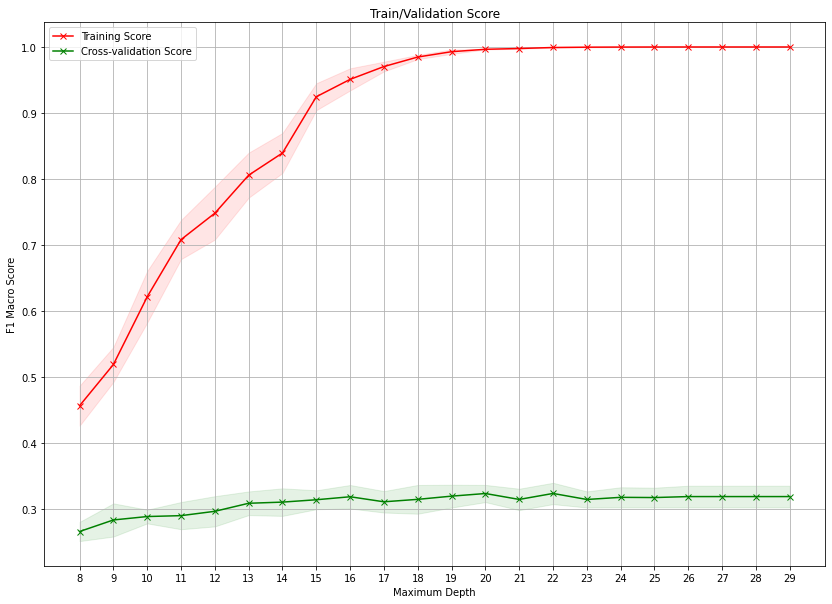

In [33]:
plot_learning_curve_hyper(df_depth, 'Maximum Depth', 'F1 Macro Score',
                          'Train/Validation Score')

In [34]:
# Exploring Hyperparameters Through Grid Search
# Min_samples_split Parameter
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'min_samples_split': [i for i in range(2, 30)]}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29]},
             return_train_score=True, scoring='f1_macro')

In [35]:
df_min_split = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'min_samples_split': 2}

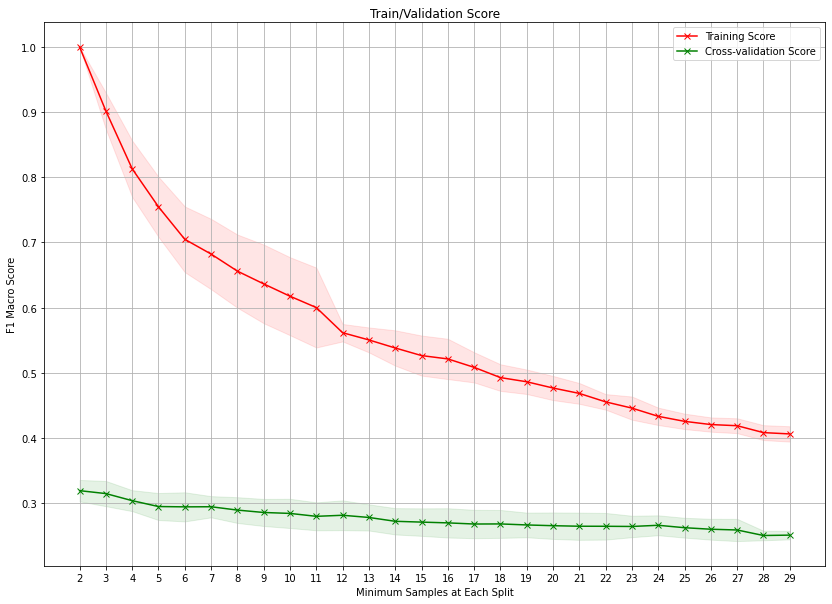

In [36]:
plot_learning_curve_hyper(df_min_split, 'Minimum Samples at Each Split', 'F1 Macro Score',
                          'Train/Validation Score')

In [37]:
# Exploring Hyperparameters Through Grid Search
# Min_samples_leaf Parameter
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'min_samples_leaf': [i for i in range(2, 30)]}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             return_train_score=True, scoring='f1_macro')

In [38]:
df_min_leaf = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'min_samples_leaf': 2}

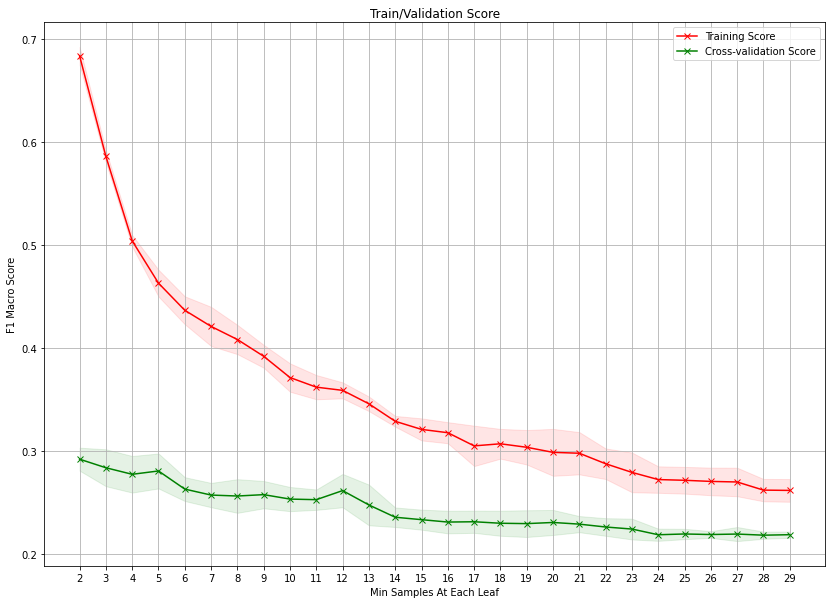

In [39]:
plot_learning_curve_hyper(df_min_leaf, 'Min Samples At Each Leaf', 'F1 Macro Score',
                          'Train/Validation Score')

In [40]:
# Exploring Hyperparameters Through Grid Search
# Max_features Parameter
from sklearn.model_selection import GridSearchCV

int_max_feature = X_train.shape[1] 
clf = DecisionTreeClassifier(random_state=0)

# param_grid = {'max_features': ['auto', X_train.shape[1], 'log2', 0.9, 0.8, 0.7, 0.6]}

param_grid = {'max_features': np.arange(0.3,1.1, 0.1).round(2)}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_features': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='f1_macro')

In [41]:
df_max_features = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'max_features': 0.9}

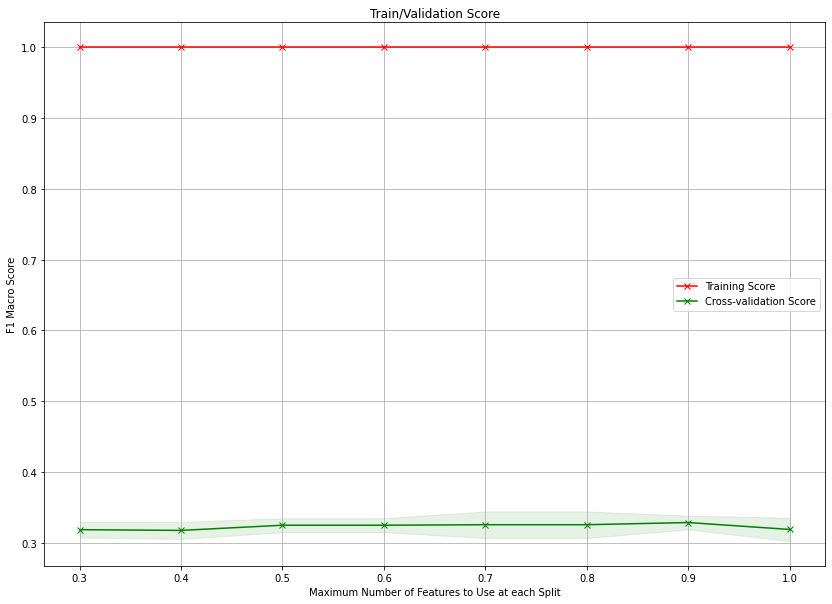

In [42]:
plot_learning_curve_hyper(df_max_features, 'Maximum Number of Features to Use at each Split', 'F1 Macro Score',
                          'Train/Validation Score')

In [43]:
# Exploring Hyperparameters Through Grid Search
# Class_weight Parameter
from sklearn.model_selection import GridSearchCV

int_max_feature = X_train.shape[1] 
clf = DecisionTreeClassifier(random_state=0)

param_grid = {'class_weight': ['balanced', None]}

grid_search = GridSearchCV(clf, param_grid =param_grid, scoring='f1_macro',
                           return_train_score=True, cv =4)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None]},
             return_train_score=True, scoring='f1_macro')

In [44]:
df_class_weight = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'class_weight': 'balanced'}

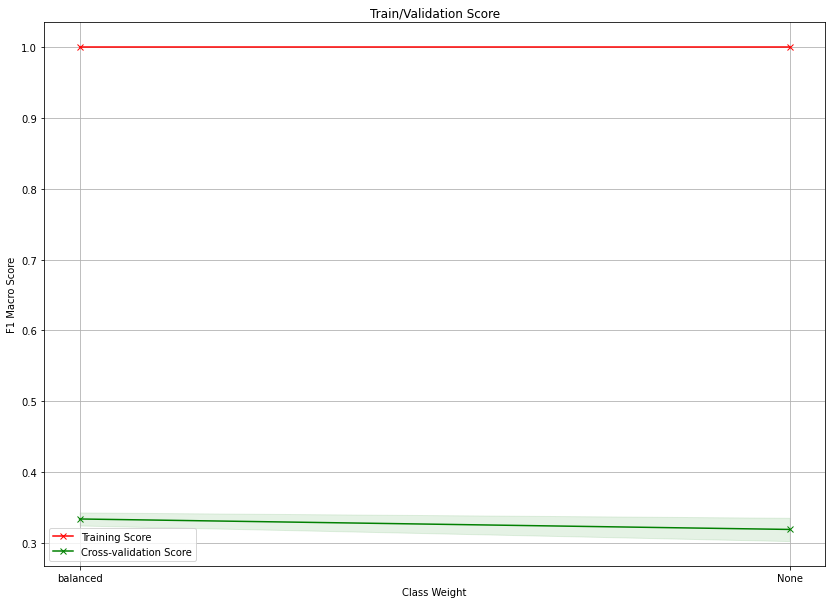

In [45]:
plot_learning_curve_hyper(df_class_weight, 'Class Weight', 'F1 Macro Score',
                          'Train/Validation Score')

In [46]:
from seaborn.axisgrid import Grid
#Final Model
# criterion='entropy',
# max_depth=22, min_samples_split=2,
# min_samples_leaf=2, splitter='best',
# max_features=0.9, class_weight='balanced'



clf_dt = DecisionTreeClassifier(random_state=0)

param_grid = [{'criterion': ['gini', 'entropy'],
               'max_depth': [i for i in range(16, 24)],
               'min_samples_split': [i for i in range(2,5)],
               'min_samples_leaf': [i for i in range(1,5)],
               'splitter': ['random', 'best'],
               'class_weight': ['balanced', None],
               'max_features': np.arange(0.5,1.1, 0.1)}]


grid_search = GridSearchCV(clf_dt, param_grid= param_grid, scoring='f1_macro',
                           return_train_score=True, cv=3, n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [16, 17, 18, 19, 20, 21, 22, 23],
                          'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4],
                          'splitter': ['random', 'best']}],
             return_train_score=True, scoring='f1_macro')

In [47]:
final_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [48]:
y_pred = final_model.predict(X_test_selected)
print(f"F1 Macro Score on Test Set: {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f'\nClassification report on test set:\n\n {classification_report(y_test, y_pred, zero_division=1)}')
print(f'\nClassification report on training set:\n\n {classification_report(y_train, final_model.predict(X_train_selected), zero_division=1)}')

F1 Macro Score on Test Set: 0.33

Classification report on test set:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.17      0.20      0.18        41
           5       0.62      0.60      0.61       364
           6       0.64      0.63      0.63       550
           7       0.52      0.56      0.54       220
           8       0.34      0.34      0.34        44
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1225
   macro avg       0.33      0.33      0.33      1225
weighted avg       0.58      0.58      0.58      1225


Classification report on training set:

               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       0.91      1.00      0.95       122
           5       0.99      0.98      0.98      1093
           6       0.99      0.96      0.97      1648
           7       

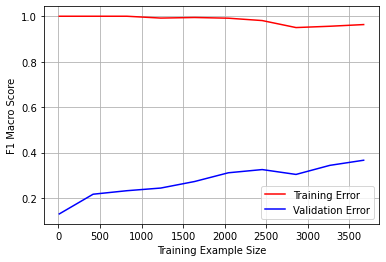

In [49]:
plot_learning_curve(final_model, X, y)

In [50]:
# The Quick and Dirty Decision Tree model Classifier With Selected Features did a better job
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf_dt_optim = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train_selected, y_train)

y_pred = clf_dt.predict(X_test_selected)

print(f'Classification Report on Test set:\n\n {classification_report(y_test, y_pred, zero_division=1)}')

Classification Report on Test set:

               precision    recall  f1-score   support

           3       0.17      0.20      0.18         5
           4       0.25      0.34      0.29        41
           5       0.62      0.61      0.62       364
           6       0.63      0.59      0.61       550
           7       0.49      0.53      0.51       220
           8       0.37      0.41      0.39        44
           9       1.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.50      0.38      0.37      1225
weighted avg       0.58      0.57      0.57      1225



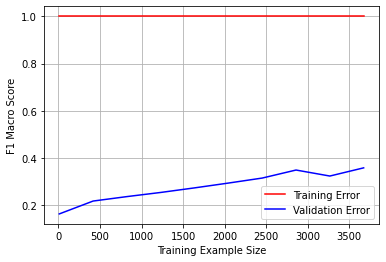

In [51]:
plot_learning_curve(clf_dt_optim, X, y)

In [52]:
y_predTrain = clf_dt.predict(X_train_selected)
print(f'Classification Report on Test set:\n\n {classification_report(y_train, y_predTrain, zero_division=1)}')

Classification Report on Test set:

               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00      1093
           6       1.00      1.00      1.00      1648
           7       1.00      1.00      1.00       660
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00         4

    accuracy                           1.00      3673
   macro avg       1.00      1.00      1.00      3673
weighted avg       1.00      1.00      1.00      3673



In [53]:
y_train.value_counts()

6    1648
5    1093
7     660
8     131
4     122
3      15
9       4
Name: quality, dtype: int64

In [54]:
#Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state =27, k_neighbors=3)
X_train_re, y_train_re = smote.fit_resample(X_train_selected, y_train)

In [55]:
#Classes are Balanced
y_train_re.value_counts()

6    1648
5    1648
7    1648
8    1648
4    1648
3    1648
9    1648
Name: quality, dtype: int64

In [56]:
#Training on Oversampled Data
clf_dt_optim.fit(X_train_re, y_train_re)

DecisionTreeClassifier(random_state=0)

In [57]:
y_pred_re = clf_dt_optim.predict(X_test_selected)
print(f'Classification Report on Upsampled Data (Test Set):\n\n {classification_report(y_pred_re, y_test)}')

Classification Report on Upsampled Data (Test Set):

               precision    recall  f1-score   support

           3       0.20      0.05      0.08        19
           4       0.34      0.19      0.24        75
           5       0.59      0.61      0.60       350
           6       0.55      0.67      0.60       448
           7       0.55      0.52      0.54       231
           8       0.50      0.22      0.31        99
           9       0.00      0.00      0.00         3

    accuracy                           0.55      1225
   macro avg       0.39      0.32      0.34      1225
weighted avg       0.53      0.55      0.53      1225



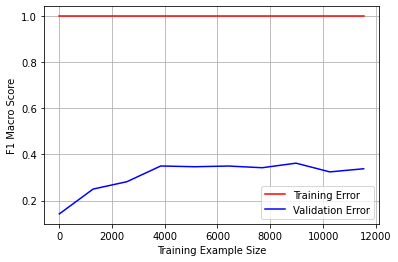

In [58]:
plot_learning_curve(clf_dt_optim, X, y, X_train= X_train_re, X_val= X_test_selected, y_train = y_train_re, y_val= y_test)

#Over Sampling didn't help with F1 Macro Score

In [59]:
# Post Pruning using Cost Complexity Pruning Path

path = clf_dt_optim.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

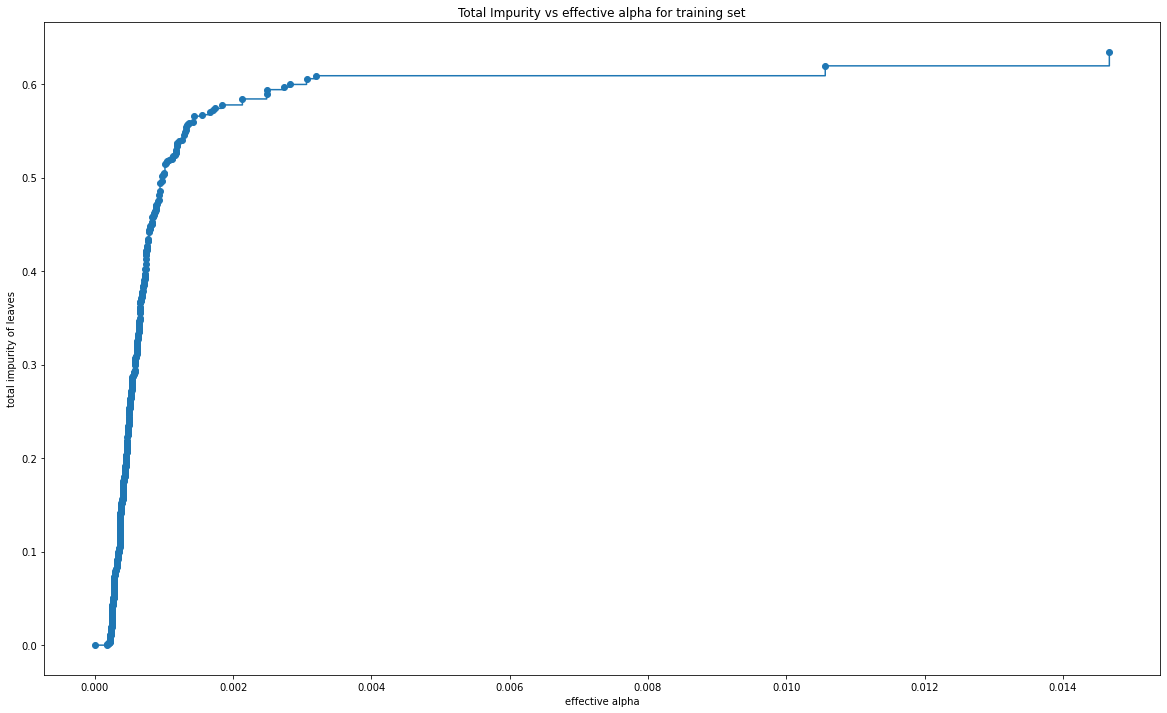

In [60]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)

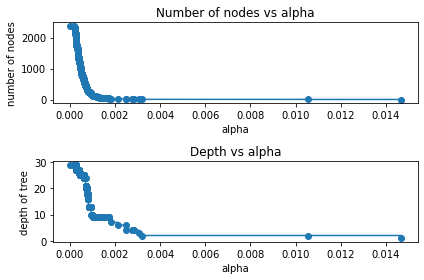

In [62]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [63]:
train_scores = [f1_score(clf.predict(X_train_selected), y_train, average='macro') for clf in clfs]
test_scores = [f1_score(clf.predict(X_test_selected), y_test, average='macro') for clf in clfs]

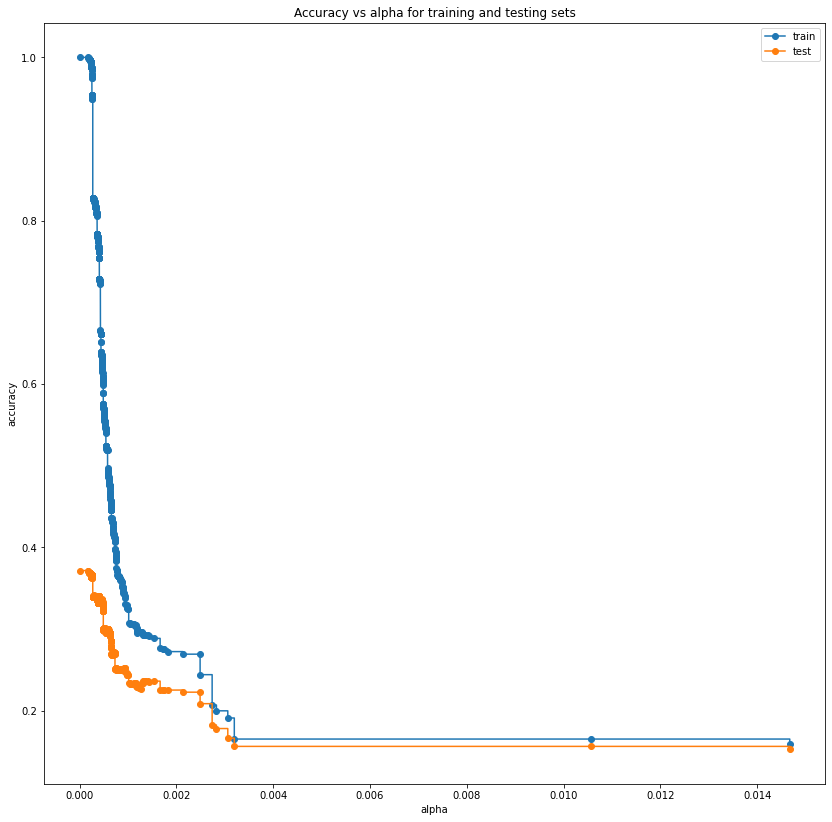

In [64]:
fig, ax = plt.subplots(figsize=(14,14))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [65]:
max_value = max(test_scores)
test_scores.index(max_value)

0

In [66]:
max_value_train = max(train_scores)
train_scores.index(max_value_train)

0

In [78]:
optim_alpha = ccp_alphas[0]
optim_alpha

0.0

In [79]:
post_pruned_model = DecisionTreeClassifier(random_state=0, ccp_alpha= optim_alpha)

post_pruned_model.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
y_pred_pp = post_pruned_model.predict(X_test_selected)

print(f'Depth of current Tree: {post_pruned_model.get_n_leaves()}')
print(f'Classification report for Post Pruned Model on Test Set:\n\n {classification_report(y_pred_pp, y_test, zero_division=1)}')
print(f'Classification report for Post Pruned Model on Training Set:\n\n {classification_report(post_pruned_model.predict(X_train_selected), y_train, zero_division=1)}')

Depth of current Tree: 1186
Classification report for Post Pruned Model on Test Set:

               precision    recall  f1-score   support

           3       0.20      0.17      0.18         6
           4       0.34      0.25      0.29        55
           5       0.61      0.62      0.62       361
           6       0.59      0.63      0.61       516
           7       0.53      0.49      0.51       238
           8       0.41      0.37      0.39        49
           9       0.00      1.00      0.00         0

    accuracy                           0.57      1225
   macro avg       0.38      0.50      0.37      1225
weighted avg       0.57      0.57      0.57      1225

Classification report for Post Pruned Model on Training Set:

               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00      1093
           6       1.00      1.00   

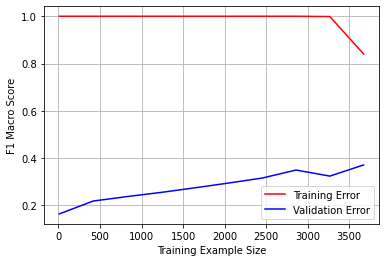

In [70]:
plot_learning_curve(post_pruned_model, X, y)

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

sm_object = SMOTE(k_neighbors=3)
smenn =SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'), smote = sm_object)
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train_selected, y_train)


In [72]:
y_train_smenn.value_counts()

9    1605
8    1364
3    1324
4    1190
7     926
5     616
6     212
Name: quality, dtype: int64

In [73]:
post_pruned_model.fit(X_train_smenn, y_train_smenn)

DecisionTreeClassifier(ccp_alpha=0.0002722570106180234, random_state=0)

In [74]:
y_pred_smenn = post_pruned_model.predict(X_test_selected)
print(f'Classification Report with SMOTEENN resampling method for Test Set: {classification_report(y_test, y_pred_smenn)}')

Classification Report with SMOTEENN resampling method for Test Set:               precision    recall  f1-score   support

           3       0.03      0.40      0.05         5
           4       0.11      0.41      0.17        41
           5       0.49      0.43      0.46       364
           6       0.58      0.13      0.21       550
           7       0.35      0.54      0.43       220
           8       0.11      0.52      0.18        44
           9       0.00      0.00      0.00         1

    accuracy                           0.32      1225
   macro avg       0.24      0.35      0.21      1225
weighted avg       0.48      0.32      0.32      1225



Edited Nearest Neighbor Over Sampling also did not help with Model Macro Score